In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torchvision.transforms.v2 as v2
from dl_toolbox import datamodules, datasets
from pathlib import Path
import os
from dl_toolbox.utils import show_detections, show_segmentations, show_classifications

In [3]:
pred_dir = Path('/data/outputs/rellis/2024-12-11_160455/0/preds')
data_dir = Path('/data')
rel_path_img = 'Rellis-3D/00000/pylon_camera_node'
rel_path_msk = 'Rellis-3D/00000/pylon_camera_node_label_id'

imgs = []
preds = []
msks = []

for pred_name in sorted(os.listdir(pred_dir/rel_path_img)):
    pred = pred_dir/rel_path_img/pred_name
    img = data_dir/rel_path_img/pred_name
    msk = data_dir/rel_path_msk/pred_name
    preds.append(pred)
    imgs.append(img.with_suffix('.jpg'))
    msks.append(msk)


In [4]:
rellis_preds = datasets.Rellis3d(imgs, preds, None, None)
rellis_true = datasets.Rellis3d(imgs, msks, 'all20', None)

/d/pfournie/dl_toolbox/venv_python3-12/lib/python3.12/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: 260 NaN values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)  # noqa: B028


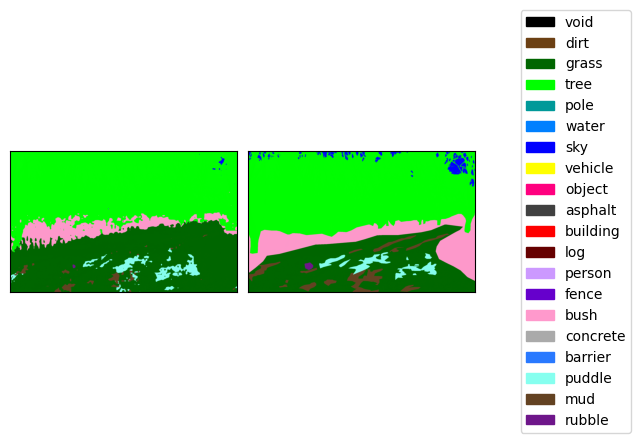

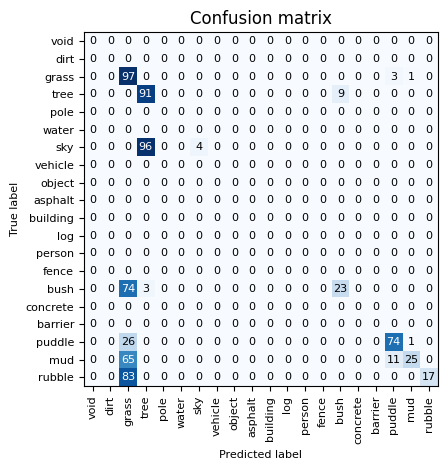

In [5]:
import torch
from PIL import Image
import numpy as np
pred = rellis_preds[6]
true = rellis_true[6]
class_list = rellis_true.class_list
num_classes = len(class_list)
class_names = [l.name for l in class_list]
seg = show_segmentations(
    [pred['image'], true['image']],
    [pred['target'], true['target']],
    class_list=class_list,
    alpha=0.99
)
from torchmetrics.functional import classification
from dl_toolbox.utils import plot_confusion_matrix
cm = classification.multiclass_confusion_matrix(pred['target'], true['target'], num_classes=num_classes, normalize='true')
cm_img = plot_confusion_matrix(cm, class_names, norm=None, fontsize=12 - 2*(num_classes//10))